 ## **HOMEWORK 1**

Afonso Rosa, ist1106700<br>
Leticia Vong, ist1105991

## **II. Programming** [9v] 

Consider the diabetes.arff data available at the homework tab, comprising 8 biological features to 
classify 768 patients into 2 classes (normal, diabetes).  
 
 
**1)** [1v] ANOVA is a statistical test that can be used to assess the discriminative power of a 
single input variable. Using f_Outcomeif from sklearn, identify the input variables with the 
worst and best discriminative power. Plot their Outcome-conditional probability density 
functions.

Best Feature: Glucose
Worst Feature: BloodPressure


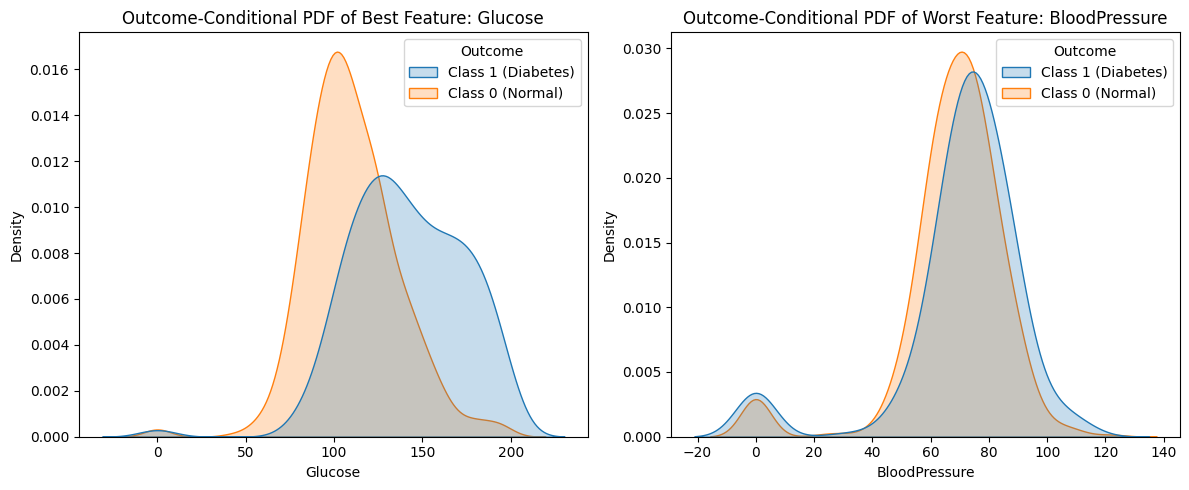

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import arff
from sklearn.feature_selection import f_classif
import seaborn as sns

data, meta = arff.loadarff('diabetes.arff')
df = pd.DataFrame(data)

X = df.drop('Outcome', axis=1)
y = df['Outcome']

F_values = f_classif(X, y)[0]


best_feature = df.columns[F_values.argmax()]
worst_feature = df.columns[F_values.argmin()]

print(f"Best Feature: {best_feature}")
print(f"Worst Feature: {worst_feature}")

outcome_mapping = {'0': 'Class 0 (Normal)', '1': 'Class 1 (Diabetes)'}
df['Outcome'] = df['Outcome'].astype(str).map(outcome_mapping)


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.kdeplot(data=df, x=best_feature, hue='Outcome', common_norm=False, fill=True)
plt.title(f'Outcome-Conditional PDF of Best Feature: {best_feature}')
plt.xlabel(best_feature)
plt.ylabel('Density')


plt.subplot(1, 2, 2)
sns.kdeplot(data=df, x=worst_feature, hue='Outcome', common_norm=False, fill=True)
plt.title(f'Outcome-Conditional PDF of Worst Feature: {worst_feature}')
plt.xlabel(worst_feature)
plt.ylabel('Density')


plt.tight_layout()
plt.show()

**2)** [4v] Using a stratified 80-20 training-testing split with a fixed seed (random_state=1), assess 
in a single plot both the training and testing accuracies of a decision tree with minimum 
sample split in {2,5,10,20,30,50,100} and the remaining parameters as default.  
[optional] Note that split thresholding of numeric variables in decision trees is non-
deterministic in sklearn, hence you may opt to average the results using 10 runs per 
parameterization.

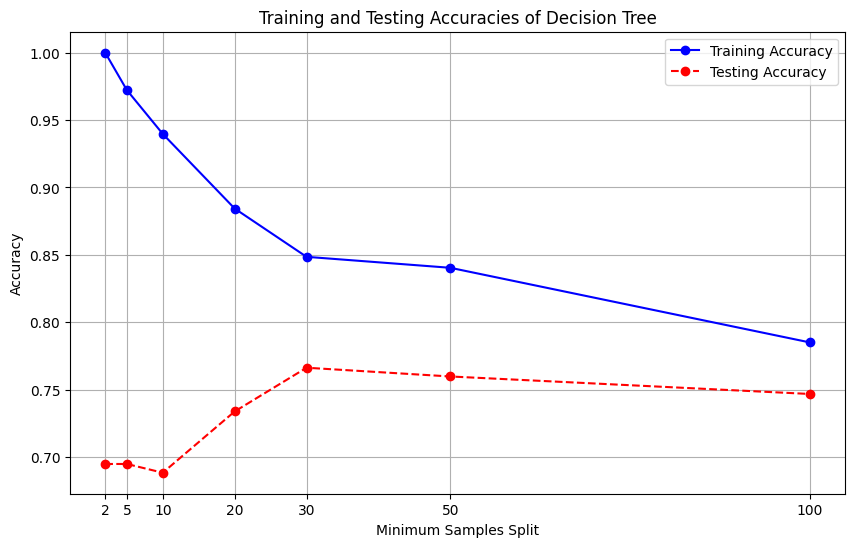

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np

X = df.drop('Outcome', axis=1)
y = df['Outcome']

min_samples_splits = [2, 5, 10, 20, 30, 50, 100]

train_accuracies = []
test_accuracies = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

n_runs = 10
for min_samples_split in min_samples_splits:
    train_acc_run = []
    test_acc_run = []
    
    for _ in range(n_runs):
        clf = DecisionTreeClassifier(min_samples_split=min_samples_split, random_state=1)
        clf.fit(X_train, y_train)

        y_train_pred = clf.predict(X_train)
        y_test_pred = clf.predict(X_test)

        train_acc_run.append(accuracy_score(y_train, y_train_pred))
        test_acc_run.append(accuracy_score(y_test, y_test_pred))                

    train_accuracies.append(np.mean(train_acc_run))
    test_accuracies.append(np.mean(test_acc_run))

plt.figure(figsize=(10, 6))
plt.plot(min_samples_splits, train_accuracies, marker='o', linestyle='-', color='blue', label='Training Accuracy')
plt.plot(min_samples_splits, test_accuracies, marker='o', linestyle='--', color='red', label='Testing Accuracy')
plt.title('Training and Testing Accuracies of Decision Tree')
plt.xlabel('Minimum Samples Split')
plt.ylabel('Accuracy')
plt.xticks(min_samples_splits)
plt.grid(True)
plt.legend()
plt.show()

**3)** [2v] Critically analyze these results, including the generalization capacity across settings. 

The experiment evaluated the impact of varying the min_samples_split parameter on the decision tree model's performance.

The min_samples_split parameter controls the minimum number of samples required to split an internal node in a decision tree. 
Lower values (e.g., 2) allow the tree to make splits with fewer data points, resulting in a highly complex and deep tree. Conversely, higher values (e.g., 100) restrict the tree’s ability to split, leading to a simpler and shallower model.
High min_samples_split (e.g., 100): The decision tree is forced to be simpler, as fewer splits are allowed. While this reduces the risk of overfitting, it can lead to underfitting, where the model fails to capture essential patterns in the data, resulting in lower accuracy on both training and testing datasets.

In scenarios with low min_samples_split, the decision tree showed high training accuracy but significantly lower testing accuracy, indicating overfitting. This disparity suggests that the model's complexity allows it to perform well on known data but poorly on new, unseen data.
As min_samples_split increased, the training accuracy consistently declined, indicating that the model’s simplicity limited its ability to capture the data's complexity.
Training Accuracy: There is a clear downward trend in training accuracy as min_samples_split increases, reflecting the reduced complexity of the model.

Testing Accuracy: The testing accuracy generally improves or stabilizes as min_samples_split increases, indicating enhanced generalization. The gap between training and testing accuracies diminishes, particularly at higher values, suggesting a balance between model complexity and generalization.


**4)** [2v] To deploy the predictor, a healthcare provider opted to learn a single decision tree 
(random_state=1) using all available data and ensuring that the maximum depth would be 3 
in order to avoid overfitting risks.  <br>

**i.** Plot the decision tree. 

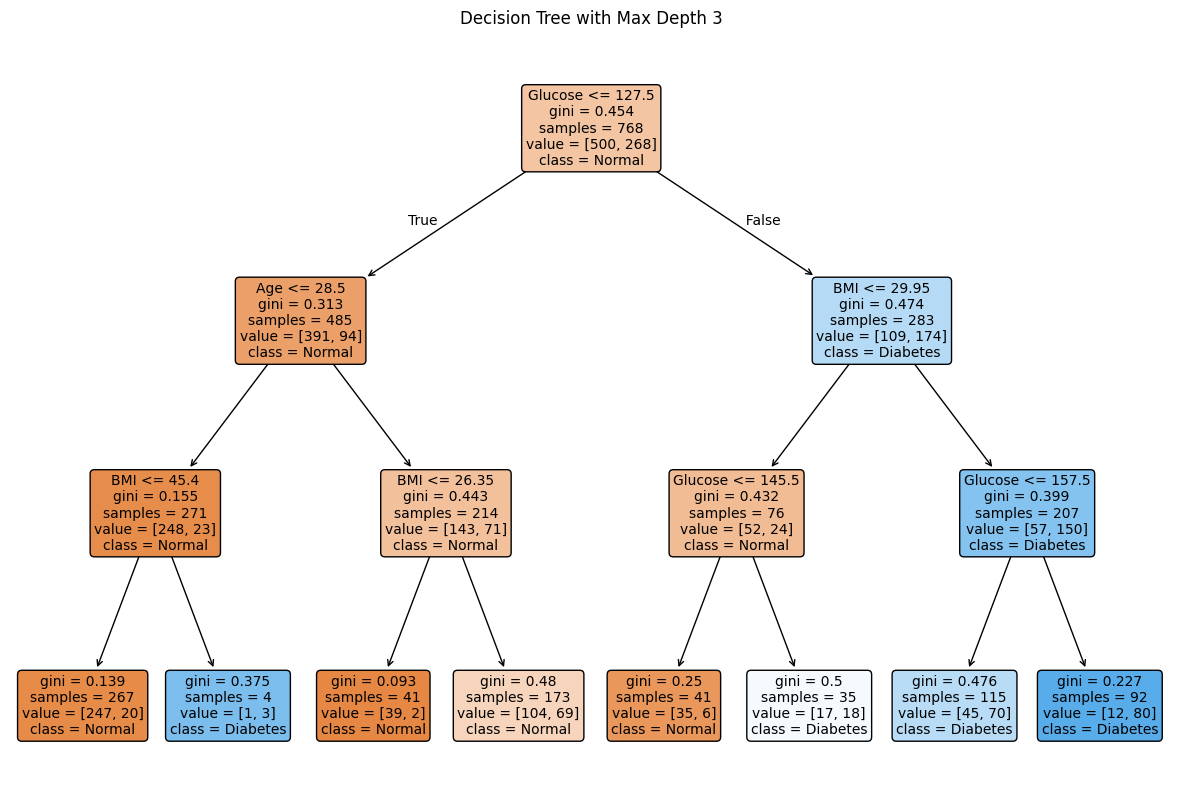

In [3]:
from sklearn.tree import plot_tree

clf = DecisionTreeClassifier(random_state=1, max_depth=3)
clf.fit(X, y)

plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=X.columns, class_names=['Normal', 'Diabetes'], filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree with Max Depth 3")
plt.show()


**ii.** Explain what characterizes diabetes by identifying the conditional associations 
together with their posterior probabilities.

Conditional associations:
    
    (Glucose <= 127.5 ∧ Age <= 28.5 ∧ BMI > 45.4) ∨ (Glucose > 145.5 ∧ BMI <= 29.25) ∨ (Glucose > 127.5 ∧ BMI > 29.25)  

Posterior probabilities:

    P(Glucose <= 127.5 ∧ Age <= 28.5 ∧ BMI > 45.4) = 3/4 = 0.75

    P(Glucose > 145.5 ∧ BMI <= 29.25) = 18/35 = 0.5143

    P(Glucose > 127.5 ∧ BMI > 29.25) = 150/207 = 0.7246  

   
